<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
!سکته‌ی عصبی
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این تمرین قصد داریم به بهانه‌ی حل مسئله‌ی پیش‌بینی سکته به کمک یک شبکه‌ی عصبی عمیق، نحوه‌ی کار با <code>keras</code> را تمرین کنیم.
مجموعه‌داده‌ی این تمرین در ارتباط با ویژگی‌های استخراج شده از چند بیمار بوده است که یکی از این ویژگی‌ها سکته‌کردن آن‌ها بوده است.  هدف این تمرین ساخت یک مدل یادگیری عمیق برای تشخیص سکته کردن/نکردن افراد بر اساس ویژگی‌های فوق است.
</font>
</p>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مجموعه‌داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مجموعه‌داده‌ای که در اختیار شما قرار گرفته وضعیت ویژگی‌های موجود عبارتند از:

</font>
</p>

<center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| توضیحات | نام ویژگی |
| :---: | :---: |
| جنسیت: "مذکر"، "مونث" یا "سایر" | <code>gender</code> |
| اگر بیمار فشار خون بالا نداشته باشد:0، 1 اگر بیمار فشار خون بالا داشته باشد |<code>hypertension</code>|
|  اگر بیمار هیچ بیماری قلبی نداشته باشد 0، 1 اگر بیمار بیماری قلبی داشته باشد. |  <code>heart_disease</code> |
| "نه" یا "بله" |<code>ever_married</code> |
|  "کودکان"، "Govt_jov"، "تابه حال کار نکرده"، "خصوصی" یا "خوداشتغالی" |  <code>work_type</code> |
| نوع_سکونت: "روستایی" یا "شهری" |  <code>Residence_type</code> |
| میانگین سطح گلوکز در خون |  <code>avg_glucose_level</code> |
| شاخص توده بدنی |  <code>bmi</code> |
| قبلاً سیگار می کشید"، "هرگز سیگار نمی کشید"، "سیگار می کشید" یا "ناشناس"* |  <code>smoking_status</code> |
| سکته مغزی: 1 اگر بیمار سکته کرده باشد یا 0 اگر نه |  <code>stroke</code> |

    
</font>
</p>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا داده‌ها را از فایل <code>data</code> موجود در پوشه بخوانید.
</font>
</p>


In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.compose import ColumnTransformer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [67]:
df = pd.read_csv('stroke-data.csv')

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">تحلیل اکتشافی داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اولین قدم پیشنهاد می‌کنیم کمی به بررسی دقیق‌تر و آماری داده‌هایی که در دسترس‌تان است بپردازید و در صورت علاقه نمودارهایی را جهت بررسی توزیع‌های داده رسم کنید. به‌عنوان مثال بررسی این‌که کدام ویژگی‌ها همبستگی بیشتری با نتیجه/هدف/برچسب دارند و این‌که آیا داده‌ها از منظر ستون هدف/برچسب متوازن است و مانند آن.
حداقل چهار گزارش از داده‌های موجود ارائه دهید.
نیازی به گزارش‌های پیچیده نیست و اگر کمک به فهم بهتر از داده‌ها کند مورد قبول است.
</font>
</p>

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [69]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


با توجه به سطر مکس و 75% میشه گفت که بی ام ای اوتلایر زیادی داره ابتدا اون هارو حذف میکنیم و استانه رو 50 قرار میدیم

In [71]:
mean_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(mean_bmi)

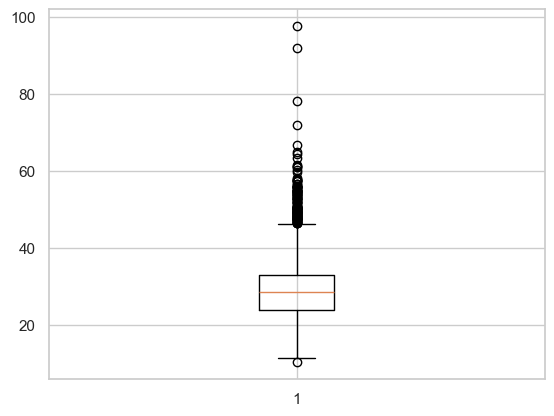

In [72]:
bmi = df['bmi']
plt.boxplot(bmi)
plt.show()

In [73]:
bmi_outlier =  df[df['bmi']>50]
bmi_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 113 to 4952
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 79 non-null     int64  
 1   gender             79 non-null     object 
 2   age                79 non-null     float64
 3   hypertension       79 non-null     int64  
 4   heart_disease      79 non-null     int64  
 5   ever_married       79 non-null     object 
 6   work_type          79 non-null     object 
 7   Residence_type     79 non-null     object 
 8   avg_glucose_level  79 non-null     float64
 9   bmi                79 non-null     float64
 10  smoking_status     79 non-null     object 
 11  stroke             79 non-null     int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 8.0+ KB


In [74]:
df = df[df['bmi'] <= 50]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5031 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5031 non-null   int64  
 1   gender             5031 non-null   object 
 2   age                5031 non-null   float64
 3   hypertension       5031 non-null   int64  
 4   heart_disease      5031 non-null   int64  
 5   ever_married       5031 non-null   object 
 6   work_type          5031 non-null   object 
 7   Residence_type     5031 non-null   object 
 8   avg_glucose_level  5031 non-null   float64
 9   bmi                5031 non-null   float64
 10  smoking_status     5031 non-null   object 
 11  stroke             5031 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 511.0+ KB


In [75]:
print(df[df['work_type'] == 'Never_worked'].info())
df[df['gender'] == 'Other'].head()


<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 253 to 4785
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22 non-null     int64  
 1   gender             22 non-null     object 
 2   age                22 non-null     float64
 3   hypertension       22 non-null     int64  
 4   heart_disease      22 non-null     int64  
 5   ever_married       22 non-null     object 
 6   work_type          22 non-null     object 
 7   Residence_type     22 non-null     object 
 8   avg_glucose_level  22 non-null     float64
 9   bmi                22 non-null     float64
 10  smoking_status     22 non-null     object 
 11  stroke             22 non-null     int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 2.2+ KB
None


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


تعدادی بدون سابقه کاری وجود داره و یک عدد هم جنسیت غیره این هارو دراپ میکنیم

In [76]:
df = df[df['work_type'] != 'Never_worked']
df = df[df['gender'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5008 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5008 non-null   int64  
 1   gender             5008 non-null   object 
 2   age                5008 non-null   float64
 3   hypertension       5008 non-null   int64  
 4   heart_disease      5008 non-null   int64  
 5   ever_married       5008 non-null   object 
 6   work_type          5008 non-null   object 
 7   Residence_type     5008 non-null   object 
 8   avg_glucose_level  5008 non-null   float64
 9   bmi                5008 non-null   float64
 10  smoking_status     5008 non-null   object 
 11  stroke             5008 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 508.6+ KB


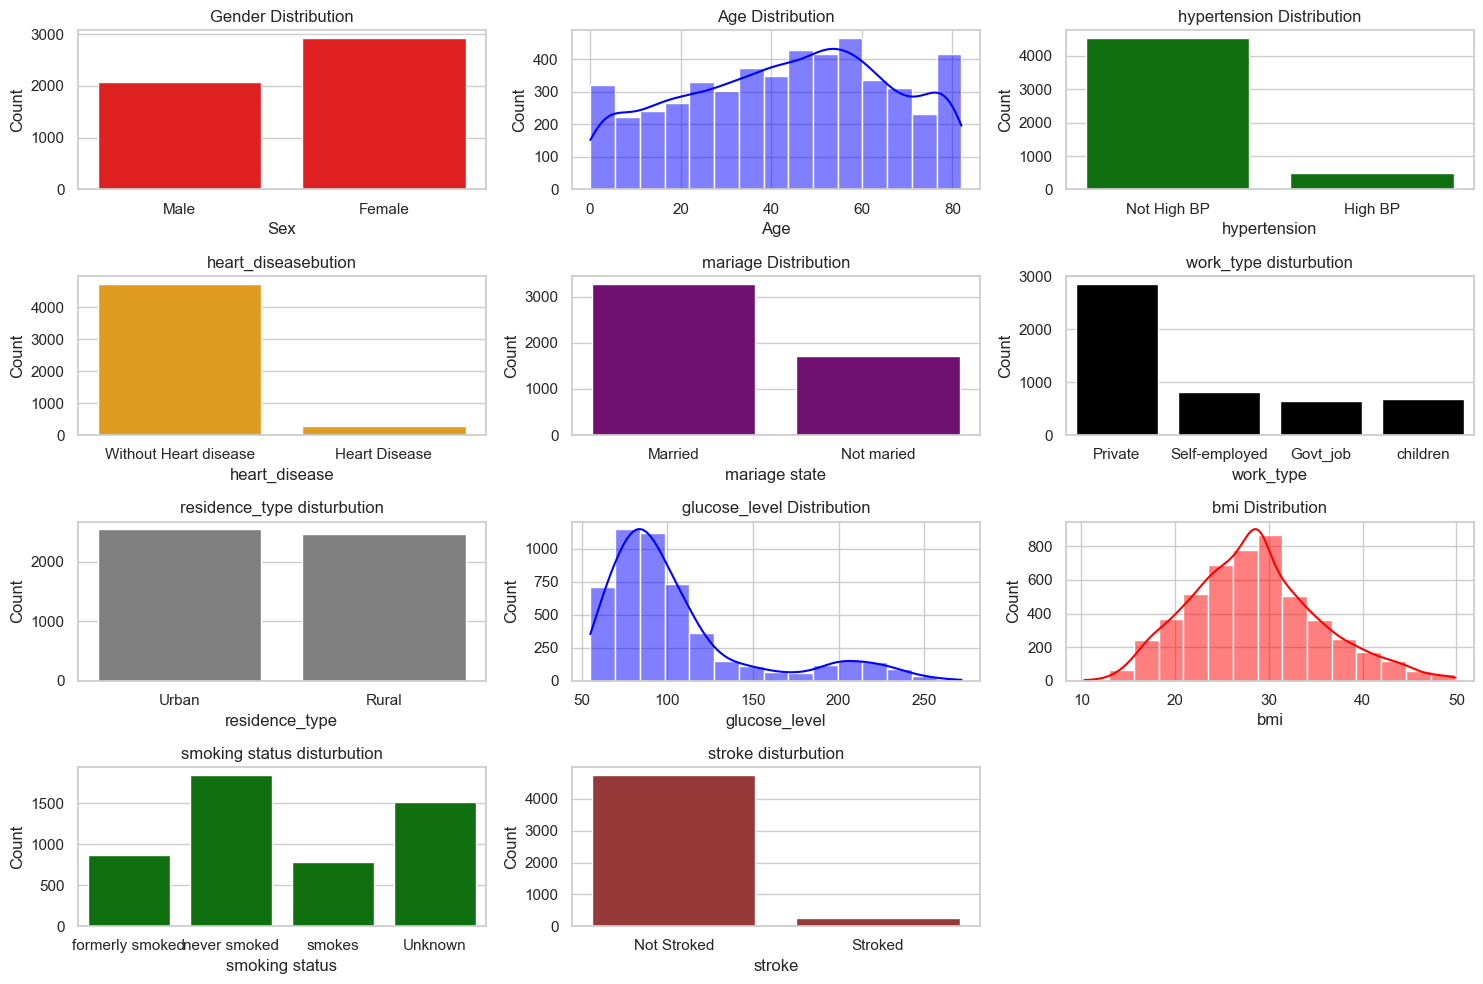

In [77]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

#Gender disturbution
plt.subplot(4,3,1)
sns.countplot(x='gender', data=df, color = 'red')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

#Age
plt.subplot(4,3,2)
sns.histplot(df['age'], kde=True, color='blue', bins=15)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

#hypertension
plt.subplot(4,3,3)
sns.countplot(x= 'hypertension', data=df, color='green')
plt.title('hypertension Distribution')
plt.xlabel('hypertension')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not High BP', 'High BP'])


# heart_disease
plt.subplot(4,3,4)
sns.countplot(x = 'heart_disease', data=df, color='orange')
plt.title('heart_diseasebution')
plt.xlabel('heart_disease')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Without Heart disease', 'Heart Disease'])


# ever_married
plt.subplot(4,3,5)
sns.countplot(x='ever_married', data=df, color='purple')
plt.title('mariage Distribution')
plt.xlabel('mariage state')
plt.ylabel('Count')
plt.xticks(ticks=['Yes','No'], labels=['Married','Not maried'])

# work_type
plt.subplot(4,3,6)
sns.countplot(x = 'work_type', data=df, color='black')
plt.title('work_type disturbution')
plt.xlabel('work_type')
plt.ylabel('Count')

# residence_type
plt.subplot(4,3,7)
sns.countplot(x ='Residence_type', data=df, color='gray')
plt.title('residence_type disturbution')
plt.xlabel('residence_type')
plt.ylabel('Count')

#average_glucose_level
plt.subplot(4,3,8)
sns.histplot(df['avg_glucose_level'], kde=True, color='blue', bins=15)
plt.title('glucose_level Distribution')
plt.xlabel('glucose_level')
plt.ylabel('Count')

#bmi
plt.subplot(4,3,9)
sns.histplot(df['bmi'], kde=True, color='red', bins=15)
plt.title('bmi Distribution')
plt.xlabel('bmi')
plt.ylabel('Count')

# smoking_status
plt.subplot(4,3,10)
sns.countplot(x ='smoking_status', data=df, color='green')
plt.title('smoking status disturbution')
plt.xlabel('smoking status')
plt.ylabel('Count')

#stroke
plt.subplot(4,3,11)
sns.countplot(x ='stroke', data=df, color='brown')
plt.title('stroke disturbution')
plt.xlabel('stroke')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Stroked', 'Stroked'])

plt.tight_layout()
plt.show()

In [78]:
df.drop('id',axis = 1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">پیش‌پردازش داده‌ها</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال به سراغ آماده‌سازی داده‌ها برای مدل‌سازی برویم.. 
<br>
داده‌ها را به دو مجموعه‌ی آموزشی (<code>train</code>) و آزمون (<code>test</code>) جدا کنید. بدین منظور ۲۰ درصد داده‌ها را برای آزمون در نظر بگیرید و <code>random_state=42</code> قرار دهید. در صورت تمایل می‌توانید بخشی از مجموعه‌ی آموزشی را جدا کرده و برای اعتبارسنجی (<code>validation</code>) استفاده کنید.
هم‌چنین داده‌های دسته‌ای (categorical) را کذگذاری (encode) کنید.
<br>
تصمیم‌گیری استفاده از تکنیک‌های دیگر همچون نرمال‌سازی بر عهده‌ی خودتان است.
</font>
</p>

In [79]:
categorical_columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

In [93]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 0 to 4952
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   float64
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   float64
 3   heart_disease                   5110 non-null   float64
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   float64
 7   gender_Female                   5110 non-null   float64
 8   gender_Male                     5110 non-null   float64
 9   ever_married_No                 5110 non-null   float64
 10  ever_married_Yes                5110 non-null   float64
 11  work_type_Govt_job              5110 non-null   float64
 12  work_type_Private               5110 no

In [102]:
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [103]:
X = df.drop('stroke', axis=1).values
y = df['stroke'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 0 to 4952
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   float64
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   float64
 3   heart_disease                   5110 non-null   float64
 4   avg_glucose_level               5110 non-null   float64
 5   bmi                             5110 non-null   float64
 6   stroke                          5110 non-null   float64
 7   gender_Female                   5110 non-null   float64
 8   gender_Male                     5110 non-null   float64
 9   ever_married_No                 5110 non-null   float64
 10  ever_married_Yes                5110 non-null   float64
 11  work_type_Govt_job              5110 non-null   float64
 12  work_type_Private               5110 no

In [105]:
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train,
    test_size=0.25,
    random_state=42
)

In [106]:
X_train_final.shape

(3066, 20)

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">
مدل‌سازی <code>Sequential</code>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت نیاز است به کمک روش <code>Sequential</code> مدلی را پیاده‌سازی کنید. در صورتی‌که قصد بررسی ساختار مدل خود و ترسیم شکل گرافی مدل خود را دارید می‌توانید از تابع <code>keras.utils.plot_model</code> کمک بگیرید (برای اطلاعات بیشتر <a href="https://keras.io/api/utils/model_plotting_utils/">این لینک</a> را مطالعه کنید).
<br>
     تابع هزینه (<code>loss</code>) و بهینه‌ساز (<code>optimizer</code>) را براساس تشخیص خود، انتخاب کنید.
 تعداد نورون‌های هر لایه و تابع فعال‌ساز آن به عهده شما است، چنان که برای بهبود عملکرد مدل خود، مواجهه با overfitting/underfitting و ... بهبود هایپرپارامترها نیز بر عهده خودتان است.
    
</font>
</p>



In [107]:
model = Sequential([
    Input(shape=(20,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از ساخت مدل آن را برای تعداد مطلوبی <code>epoch</code> با اندازه‌ی دسته <code>batch</code> آموزش دهید. در صورت علاقه می‌توانید به کمک آرگومان <code>validation_split</code> از بخشی از داده‌های آموزشی برای اعتبارسنجی استفاده کنید (مقدار پیشنهادی <code>0.2</code> است).
<br>
پس از آموزش مدل، مقدار <code>loss</code> و <code>accuracy</code> را برای داده‌های آموزشی و آزمون محاسبه کرده و چاپ کنید.
</font>
</p>

In [108]:
history = model.fit(
    X_train_final, y_train_final,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6771 - loss: 783.1358 - val_accuracy: 0.9423 - val_loss: 11.9555
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8845 - loss: 11.8626 - val_accuracy: 0.9423 - val_loss: 15.6130
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9037 - loss: 21.4800 - val_accuracy: 0.9423 - val_loss: 11.8293
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8934 - loss: 16.0917 - val_accuracy: 0.9423 - val_loss: 23.9518
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9072 - loss: 16.6726 - val_accuracy: 0.9403 - val_loss: 2.2865
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8813 - loss: 10.6187 - val_accuracy: 0.9423 - val_loss: 17.1545
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9026 - loss: 10.3655 - val_accuracy: 0.9423 - val_loss: 8.2147
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9157 - loss: 9.5869 - val_accuracy: 0.9

In [100]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 1.6282 
Test Accuracy: 86.40%


In [87]:
y_pred = model.predict(X_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">ارزیابی مدل ها به همراه رسم نمودار</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای بررسی دقت عملکرد مدل‌هایی که ساخته‌اید، <code>confusion matrix</code> را رسم کنید. در ادامه نمودارهای <code>accuracy</code> بر اساس <code>epoch</code> و <code>loss</code> بر حسب <code>epoch</code> را نیز رسم کنید.
</font>
</p>

<center>
</center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>سلول‌های زیر جهت شفاف‌تر شدن و یکسان شدن تحلیل نتایج می‌باشد و فقط نام متغیرها را برای درست اجرا شدن تغییر دهید.
</font>
</p>

In [88]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9338 - loss: nan
Train Loss: nan, Train Accuracy: 0.9357


In [89]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9241 - loss: nan 
Test Loss: nan, Test Accuracy: 0.9149


In [112]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

c:\Users\AmirReza\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\_array_api.py:392: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.

In [ ]:
print(classification_report(y_test, y_pred))

In [66]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,373 (40.52 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,916 (27.02 KB)

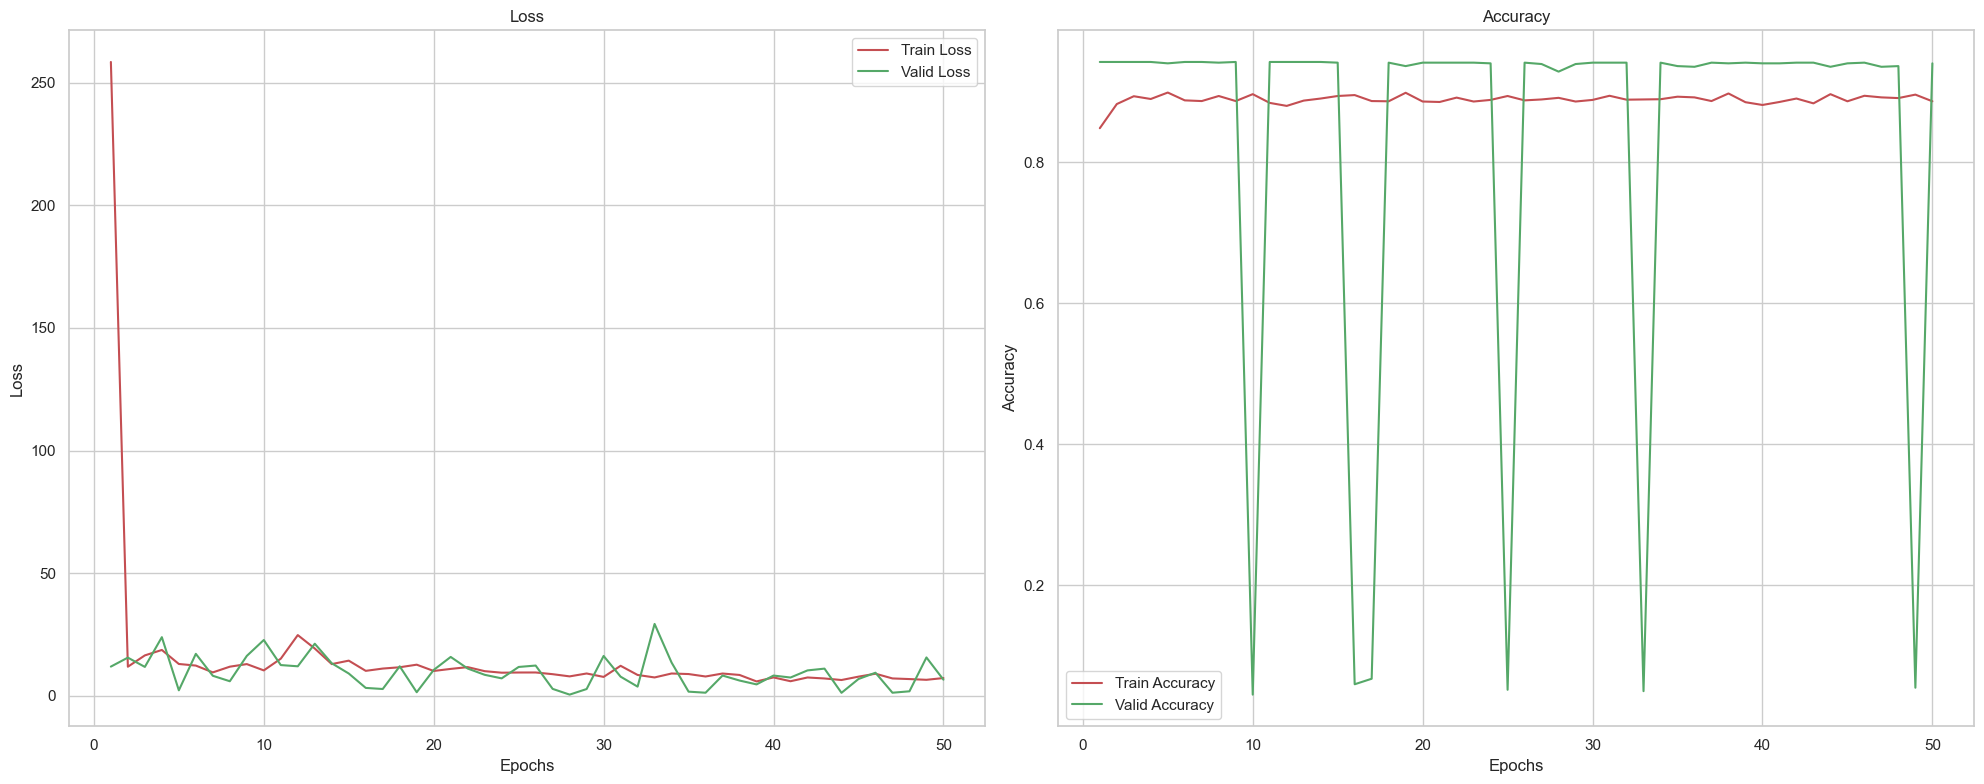

In [111]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()